In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [3]:
data=pd.read_csv('..\\Dataset\\Dataset_agumented1.csv')
sample_data=data['Text'].values

In [4]:
#CountVectorize
count_vectorize=CountVectorizer()
vm=count_vectorize.fit_transform(sample_data)

In [5]:
doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(vm)]
feat_names = count_vectorize.get_feature_names_out()


sample_df = pd.DataFrame(data=vm.toarray(), index=doc_names,columns=feat_names)
sample_df


,ability,about,academic,accord,accurate,action,active,activity,actual,additionally,...,within,without,word,world,worldwide,would,year,years,zones,φύσις
Doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Doc96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(data['Text'].values,data['Class'].values,test_size=0.2,random_state=123,stratify=data['Class'].values)

In [87]:

tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train).toarray()

tfidf_test_vectors = tfidf_vectorizer.transform(X_test).toarray()


NameError: name 'TfidfVectorizer' is not defined

In [8]:
print(tfidf_train_vectors)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [10]:
predicted = model.fit(tfidf_train_vectors,y_train)

In [11]:
y_pred=model.predict(tfidf_test_vectors)

In [14]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

ValueError: Length of values (2345) does not match length of index (11722)

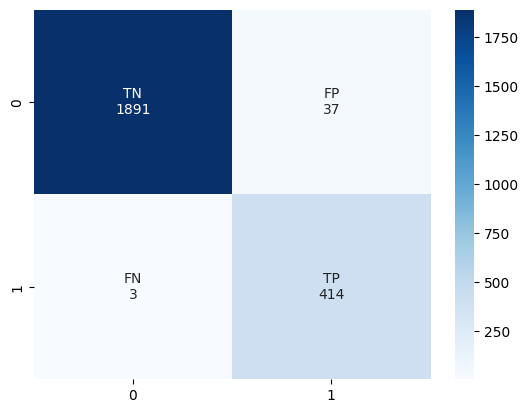

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import numpy as np
cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

In [21]:
input_test=['je suis matteo ']
tfidf_version=tfidf_vectorizer.transform(input_test).toarray()

print(model.predict(tfidf_version))

[0]


### 1. handling undersample

In [72]:
from collections import Counter
smote = SMOTE(random_state=42)
X_train_ros, y_train_ros= smote.fit_resample(tfidf_train_vectors, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0, 7711), (1, 7711)]


In [73]:
predicted = model.fit(X_train_ros,y_train_ros)


In [74]:
y_pred=model.predict(tfidf_test_vectors)

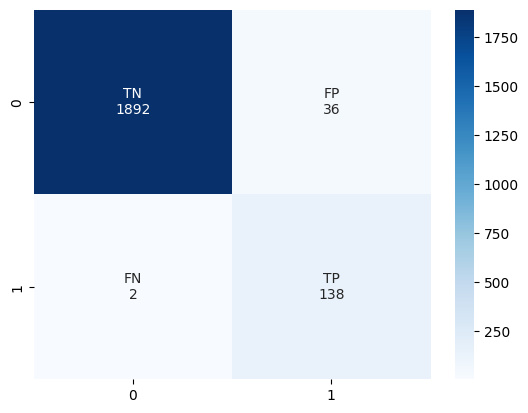

In [75]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import numpy as np
cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [1]:
input_test=['il big gatto è bello']
tfidf_version=tfidf_vectorizer.transform(input_test).toarray()

print(model.predict(tfidf_version))

NameError: name 'tfidf_vectorizer' is not defined

In [20]:
#Using word2vec as embedding system words
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#display the tagged docs
import pandas as pd

In [16]:
#importing the dataset agumented
data=pd.read_csv('..\\Dataset\\Dataset_agumented1.csv')
#removing not needed cols
data=data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
data.to_csv('..\\Dataset\\Dataset_agumented1.csv')

In [17]:
#tokenizing the elements
words=data['Text']
words


0        nature in the broadest sense is the natural ph...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4        the word nature is borrowed from the old frenc...
                               ...                        
11717    qual è stato il tuo errore vieni ti diamo da m...
11718    narcisa ha cambiato i suoi modi, all'inizio ha...
11719    com'è il narcisismo ora Marian ha detto a entr...
11720    ha lei immagino che non vorrebbe più pane d'or...
11721    terry in realtà assomigli un po' a quell'angel...
Name: Text, Length: 11722, dtype: object

In [23]:
#tokenize and tag the card text
text_docs_words = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(data['Text'])]
text_docs_words

[TaggedDocument(words=['nature', 'in', 'the', 'broadest', 'sense', 'is', 'the', 'natural', 'physical', 'material', 'world', 'or', 'universe.'], tags=[0]),
 TaggedDocument(words=['nature', 'can', 'refer', 'to', 'the', 'phenomena', 'of', 'the', 'physical', 'world', 'and', 'also', 'to', 'life', 'in', 'general.'], tags=[1]),
 TaggedDocument(words=['the', 'study', 'of', 'nature', 'is', 'a', 'large', 'if', 'not', 'the', 'only', 'part', 'of', 'science.'], tags=[2]),
 TaggedDocument(words=['although', 'humans', 'are', 'part', 'of', 'nature', 'human', 'activity', 'is', 'often', 'understood', 'as', 'a', 'separate', 'category', 'from', 'other', 'natural', 'phenomena.'], tags=[3]),
 TaggedDocument(words=['the', 'word', 'nature', 'is', 'borrowed', 'from', 'the', 'old', 'french', 'nature', 'and', 'is', 'derived', 'from', 'the', 'latin', 'word', 'natura', 'or', 'essential', 'qualities', 'innate', 'disposition', 'and', 'in', 'ancient', 'times', 'literally', 'meant', 'birth.'], tags=[4]),
 TaggedDocume

In [75]:
#creating a doc2vec model
model=Doc2Vec()
model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=8, epochs = 40)
model.build_vocab(text_docs_words)

In [76]:
model.train(text_docs_words,total_examples=model.corpus_count,epochs=model.epochs)

In [77]:
card2vec = [model.infer_vector((data['Text'][i].split(' '))) 
            for i in range(0,len(data['Text']))]
card2vec

[array([ 0.01054312, -0.29549664, -0.00837884,  0.38662428,  0.17672214,
         0.46088657,  0.09237788,  0.10468661, -0.1251193 ,  0.14651985,
        -0.08063905,  0.37539846,  0.14605571, -0.14924836,  0.24271685,
        -0.13615204,  0.53050804, -0.03333011, -0.042983  ,  0.21322004,
         0.08419034,  0.2663597 , -0.21453646,  0.2520072 ,  0.22394942,
         0.00738267, -0.12287383, -0.03261226,  0.05803931, -0.0176493 ,
        -0.17288579,  0.04998267,  0.16335368, -0.2741716 , -0.0593003 ,
         0.20310445,  0.05101338,  0.01189737,  0.12759733,  0.29497227,
         0.08469868,  0.12057834, -0.0403381 ,  0.08448587,  0.03428946,
        -0.3664411 ,  0.3281105 ,  0.31060478, -0.04500411,  0.49685872],
       dtype=float32),
 array([ 0.15373234, -0.28571776, -0.19284339,  0.1473131 ,  0.3899984 ,
         0.19128533,  0.17275521,  0.21092398,  0.19205952,  0.42742193,
        -0.48992682, -0.11187366,  0.26028362,  0.17099884,  0.10271526,
        -0.15609223,  0.331

In [66]:
import numpy as np
#Create a list of lists
dtv= np.array(card2vec).tolist()
#set list to dataframe column
data['card2vec'] = dtv
data.head(2)

,Text,Language,Class,Number of words,Number of spaces,card2vec
0,nature in the broadest sense is the natural ph...,English,0,13,12,"[0.08997764438390732, 0.039272624999284744, -0..."
1,nature can refer to the phenomena of the physi...,English,0,16,15,"[-0.10991939902305603, -0.19206121563911438, 0..."


In [67]:
#saving the new dataset
data.to_csv('..\\Dataset\\Dataset_agumented_doc2vec.csv')
data.head(10)

,Text,Language,Class,Number of words,Number of spaces,card2vec
0,nature in the broadest sense is the natural ph...,English,0,13,12,"[0.08997764438390732, 0.039272624999284744, -0..."
1,nature can refer to the phenomena of the physi...,English,0,16,15,"[-0.10991939902305603, -0.19206121563911438, 0..."
2,the study of nature is a large if not the only...,English,0,14,13,"[0.030267395079135895, 0.12603984773159027, -0..."
3,although humans are part of nature human activ...,English,0,19,18,"[-0.04671622812747955, -0.16837359964847565, -..."
4,the word nature is borrowed from the old frenc...,English,0,30,29,"[0.18355783820152283, -0.180352121591568, -0.0..."
5,in ancient philosophy natura is mostly used as...,English,0,38,37,"[0.2756498456001282, -0.38592764735221863, 0.1..."
6,the concept of nature as a whole the physical ...,English,0,50,49,"[0.06359807401895523, -0.33599013090133667, -0..."
7,during the advent of modern scientific method ...,English,0,23,22,"[0.1284828782081604, -0.18279781937599182, 0.1..."
8,with the industrial revolution nature increasi...,English,0,41,40,"[0.060529112815856934, -0.573809027671814, 0.3..."
9,however a vitalist vision of nature closer to ...,English,0,21,20,"[0.11259043216705322, 0.010634725913405418, -0..."


In [68]:
#training the model, selecte model, baysian classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as Sns
import scipy.stats as stats

In [69]:
def create_dataset(data_input):
    data=[]
    for i in data_input:
        data.append(i)

    return data

In [70]:
X=data['card2vec']
Y=data['Class']

#the embeddings need to be converted into a matrix for the input to the model
X=create_dataset(X)
X=pd.DataFrame(data=X)
X.to_csv('..\\Dataset\\Embeddings.csv')
X.head(10)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.089978,0.039273,-0.187765,0.163082,-0.041448,-0.169050,0.203954,0.124043,0.024951,0.093432,...,-0.431340,0.070282,-0.169451,0.254521,0.108214,0.092259,0.071630,-0.104791,0.115362,-0.107017
1,-0.109919,-0.192061,0.035182,0.078851,-0.264220,-0.104614,0.086728,0.253967,-0.118015,-0.144816,...,-0.181693,0.120485,0.122109,0.022995,-0.141967,0.339324,0.051224,-0.323287,0.266707,-0.032862
2,0.030267,0.126040,-0.038857,0.193451,0.155130,-0.080694,0.077767,-0.086752,0.146177,0.177637,...,-0.183646,0.001970,-0.075693,0.076191,0.067807,0.120247,0.000555,-0.055850,0.073222,-0.013457
3,-0.046716,-0.168374,-0.046596,0.105520,0.031009,-0.058699,0.132289,-0.078463,0.121925,0.134839,...,-0.296501,-0.078077,-0.370493,0.345150,-0.073716,0.013995,0.025035,-0.203451,0.174800,0.114680
4,0.183558,-0.180352,-0.058043,0.492043,-0.228964,-0.174921,0.177971,-0.034426,-0.075919,0.281536,...,-0.565996,-0.337506,-0.629986,0.095102,-0.378463,0.252352,0.234968,-0.407075,0.162415,0.172469
5,0.275650,-0.385928,0.132676,0.176320,-0.245400,-0.282953,0.236732,0.071850,-0.025449,0.092724,...,-0.288093,-0.366004,-0.811673,0.419094,-0.161370,0.036022,0.142984,-0.505827,0.333443,0.129132
6,0.063598,-0.335990,-0.063840,-0.058745,-0.269850,-0.371455,0.529938,0.105917,0.407336,0.043798,...,-0.582364,-0.139303,-0.643601,0.422023,-0.109332,0.160506,-0.022489,-0.973114,0.461132,0.301580
7,0.128483,-0.182798,0.106306,0.074532,-0.158366,-0.359862,0.391345,0.019772,0.007682,0.135809,...,-0.267531,-0.057310,-0.537577,0.105203,-0.004044,0.277217,0.149424,-0.426812,0.230310,-0.242467
8,0.060529,-0.573809,0.332354,0.067387,-0.032570,-0.351278,0.614733,-0.170426,0.403920,0.104097,...,-0.565524,-0.036952,-0.568465,0.505585,-0.066388,0.001336,0.070424,-0.881319,0.403886,0.101502
9,0.112590,0.010635,-0.105691,0.041782,-0.101459,-0.291655,0.407338,-0.127238,0.128254,-0.002956,...,-0.343109,0.057499,-0.367651,0.399423,0.120621,0.048791,-0.193756,-0.539646,0.163130,0.021109


In [71]:
#Train test split (using 77% test and 23% train)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.23, random_state=125
)
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
9484,-0.043433,-0.431372,-0.005305,-0.213071,-0.035286,-0.549084,0.043928,-0.331515,0.591007,0.532735,...,-0.174529,-0.221594,-0.348632,0.259271,-0.203231,0.303189,0.356196,-0.371029,0.252801,-0.255316
5947,-0.543789,-0.549945,-0.080111,-0.043991,-0.166716,-0.785582,-0.171494,-0.380199,0.058301,-0.034967,...,-0.874708,-0.391038,-0.621367,0.715593,-0.329953,0.311681,0.052443,-0.224596,0.558360,0.348190
7836,-0.045347,-0.458589,0.348452,0.042225,0.026976,-0.227648,0.032982,-0.434189,0.195324,0.201703,...,-0.359484,-0.048657,-0.406172,0.295030,-0.031658,0.062359,-0.065380,-0.282194,0.180679,-0.001288
5195,-0.137337,-0.225463,-0.051610,-0.272976,-0.103991,-0.317548,0.322439,0.581143,0.006036,-0.005625,...,0.386336,-0.011774,0.144534,0.264860,1.083507,0.805981,-0.937924,-0.630570,0.323223,-0.180515
1382,0.351798,-0.402716,0.170961,-0.170771,-0.130481,-0.189346,0.102574,-0.228905,0.040390,0.025394,...,-0.414070,0.023501,-0.385088,0.217225,-0.287258,0.059262,-0.063252,-0.596154,0.303539,0.500692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,-0.087927,-0.053127,0.023948,0.002249,-0.071818,-0.062699,0.106489,0.029641,-0.015442,-0.082148,...,-0.056912,0.010001,-0.238897,0.105420,0.149568,0.049657,-0.237985,0.157593,0.058713,-0.023805
3927,-0.233645,-0.159073,-0.031954,0.069104,0.010161,-0.364561,0.176972,-0.250305,0.120461,0.295233,...,-0.068718,0.140654,-0.317199,0.395258,0.046678,0.127759,-0.173761,0.033845,0.270921,-0.231746
5346,-0.108253,-0.133633,0.047380,-0.048005,-0.113376,-0.211969,-0.095187,-0.072757,-0.028287,-0.037080,...,-0.198831,0.006342,-0.064180,0.297735,0.099939,0.101646,-0.206488,-0.088605,0.289185,0.098289
10397,0.198097,-0.140898,0.224883,0.214276,0.056673,-0.341957,0.053029,0.151998,-0.096860,-0.023498,...,0.246711,-0.254103,-0.397573,0.236847,0.110918,0.240631,-0.045103,-0.071125,0.186802,-0.148337


In [72]:
from sklearn.naive_bayes import GaussianNB
# Model training
model=GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [73]:
y_pred=model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
accuray

0.7274749721913237

In [74]:
from sklearn.metrics import f1_score
f1 = f1_score(y_pred, y_test, average="weighted")
f1

0.6950464989809594

In [81]:
import numpy as np
def evaluate_model(i):
    model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=8, epochs = 40)
    model.build_vocab(text_docs_words)
    model.train(text_docs_words,total_examples=model.corpus_count,epochs=model.epochs)
    card2vec = [model.infer_vector((data['Text'][i].split(' '))) 
            for i in range(0,len(data['Text']))]
    
    #Create a list of lists
    dtv= np.array(card2vec).tolist()
    #set list to dataframe column
    data['card2vec'] = dtv
    X=data['card2vec']
    Y=data['Class']
    #the embeddings need to be converted into a matrix for the input to the model
    X=create_dataset(X)
    X=pd.DataFrame(data=X)
    X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.10, random_state=125
    )
    model=GaussianNB()
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    f1 = f1_score(y_pred, y_test, average="weighted")
    return f1


    




### Finding best hyperparam for doc2vec

In [85]:
#analyzing diffrerent settings of Doc2Vec for best hyperparam
list_of_long_vector=list(range(10,100,5))
f1_scores=[]
for i in list_of_long_vector:
    evaluate=evaluate_model(i)
    f1_scores.append(evaluate)



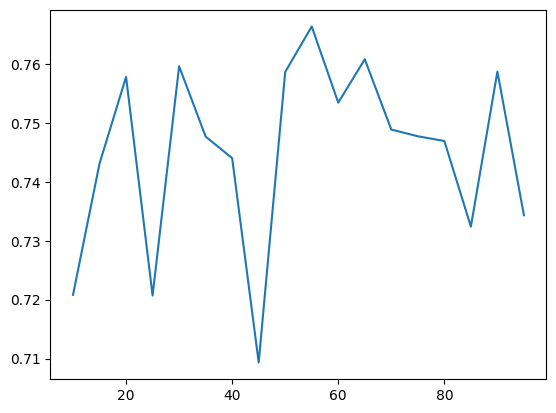

In [86]:
plt.plot(list_of_long_vector,f1_scores)
plt.show()

# Finding best hyperparam for tfidf